<a href="https://colab.research.google.com/github/GreisonMontenari/Cartorioebac/blob/main/Profissao_Analista_de_dados_M15_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

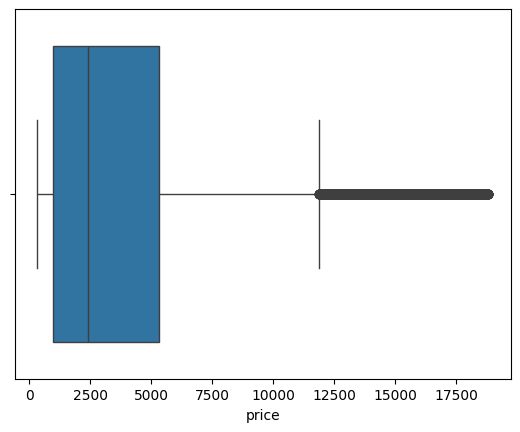

In [1]:
# gráfico do exercício 1

diamonds = ...

import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
data = sns.load_dataset("diamonds")

# Plot a boxplot to visualize the outliers in the diamond prices
sns.boxplot(x='price', data=data)

# Display the plot
plt.show()

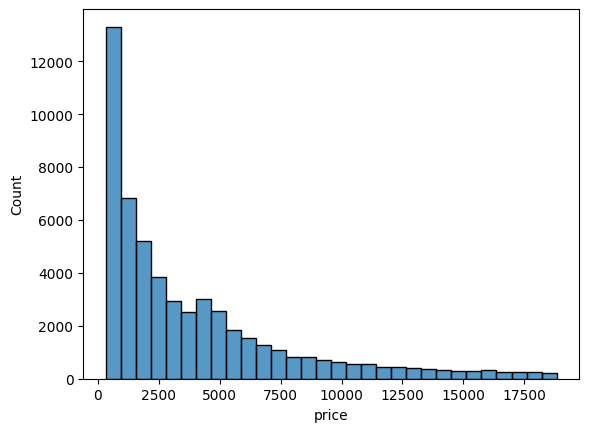

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
data = sns.load_dataset("diamonds")

# Plot a histogram to visualize the distribution of diamond prices
sns.histplot(data=data, x='price', bins=30)

# Display the plot
plt.show()

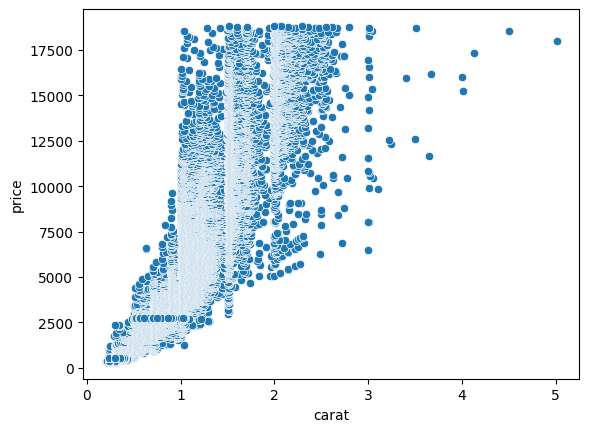

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
data = sns.load_dataset("diamonds")

# Plot a scatter plot to visualize the relationship between price and carat
sns.scatterplot(x='carat', y='price', data=data)

# Display the plot
plt.show()

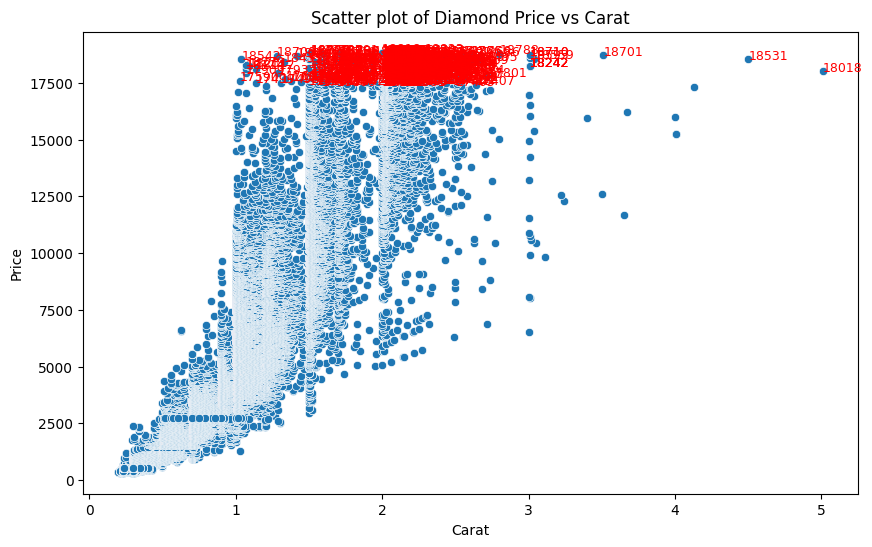

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados de diamantes
data = sns.load_dataset("diamonds")

# Plotar um gráfico de dispersão de preço versus quilates
plt.figure(figsize=(10,6))
sns.scatterplot(x='carat', y='price', data=data)

# Identificar os outliers
outliers = data[data['price'] > data['price'].quantile(0.99)]
for i in range(len(outliers)):
    plt.text(outliers.iloc[i]['carat'], outliers.iloc[i]['price'], outliers.iloc[i]['price'], fontsize=9, color='red')

# Definir rótulos e título
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter plot of Diamond Price vs Carat')

# Mostrar o gráfico
plt.show()

**Insight do gráfico 1**: ...

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [5]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


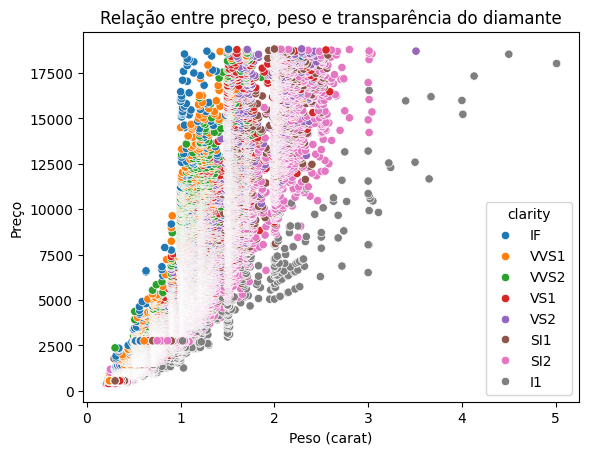

In [6]:

# gráfico do exercício 2

diamonds = ...

import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados diamonds
data = sns.load_dataset("diamonds")

# Plotar o gráfico de dispersão com a relação entre preço, peso e transparência
sns.scatterplot(data=data, x='carat', y='price', hue='clarity')
plt.title('Relação entre preço, peso e transparência do diamante')
plt.xlabel('Peso (carat)')
plt.ylabel('Preço')
plt.show()

In [8]:
# gráfico do exercício 2

diamonds = ...

**Insight do gráfico 2**: ...

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [9]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: xlabel='weight', ylabel='Count'>

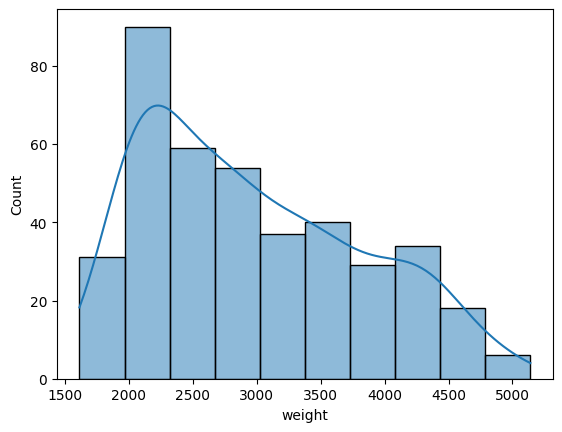

In [10]:
# gráfico do exercício 3

cars = ...

import seaborn as sns

data = sns.load_dataset("mpg")

# Plotando o histograma do peso dos carros
sns.histplot(data=data, x='weight', kde=True)


**Insight do gráfico 3**: ...

---